In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Prepare the data
data_actual=pd.read_csv('../../Data/Actuals.csv')
data_actual = data_actual.drop(columns='TICKER')

data_actual = data_actual[data_actual['PENDS'] > '2014-12-31']

In [52]:
data_actual.head(100)

,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,VALUE
3,PAYC,PAYCOM SOFTWARE,2015-03-31,EPS,QTR,2015-05-06,0.12
4,PAYC,PAYCOM SOFTWARE,2015-06-30,EPS,QTR,2015-08-04,0.10
5,PAYC,PAYCOM SOFTWARE,2015-09-30,EPS,QTR,2015-11-03,0.08
6,PAYC,PAYCOM SOFTWARE,2015-12-31,EPS,QTR,2016-02-09,0.10
7,PAYC,PAYCOM SOFTWARE,2016-03-31,EPS,QTR,2016-05-03,0.33
...,...,...,...,...,...,...,...
101,KEYS,KEYSIGHT TECH,2022-04-30,EPS,QTR,2022-05-17,1.83
102,KEYS,KEYSIGHT TECH,2022-07-31,EPS,QTR,2022-08-17,2.01
103,KEYS,KEYSIGHT TECH,2022-10-31,EPS,QTR,2022-11-17,2.14
104,KEYS,KEYSIGHT TECH,2023-01-31,EPS,QTR,2023-02-21,2.02


In [53]:
measures = ["EPS","ROE","SAL","NET","EBI","EBT","GPS","DPS","BPS","NAV"]
df_actual = data_actual[data_actual["MEASURE"].isin(measures)]
df_actual.isna().sum()

OFTIC          0
CNAME          0
PENDS          0
MEASURE        0
PDICITY        0
ANNDATS        0
VALUE      11388
dtype: int64

In [54]:
# For Actual

missing_values_actual = data_actual.isnull()

# Count missing values and display
for column in data_actual.columns:
    missing_count = missing_values_actual[column].sum()
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'OFTIC' has 0 missing values.
Column 'CNAME' has 0 missing values.
Column 'PENDS' has 0 missing values.
Column 'MEASURE' has 0 missing values.
Column 'PDICITY' has 0 missing values.
Column 'ANNDATS' has 0 missing values.
Column 'VALUE' has 103650 missing values.


In [55]:
# Number of unique measure
len(data_actual['MEASURE'].unique())

22

In [56]:
# For Actual check quarter and value

data_actual['PENDS'] = pd.to_datetime(data_actual['PENDS'])

min_date_actual = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index().sort_values(by='PENDS', ascending=False)

#filtered_data = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index()


#filtered_data
min_date_actual

,OFTIC,MEASURE,PENDS
4347,GEHC,EBT,2023-03-31
4348,GEHC,ENT,2023-03-31
4360,GEHC,SAL,2023-03-31
4359,GEHC,ROE,2023-03-31
4358,GEHC,ROA,2023-03-31
...,...,...,...
2360,COO,NET,2015-01-31
2361,COO,OPR,2015-01-31
2362,COO,PRE,2015-01-31
2363,COO,ROA,2015-01-31


In [57]:
filtered_df = min_date_actual[min_date_actual['PENDS'] > '2015-01-01']
len(filtered_df)

11002

In [58]:
# The function which is getting the date and giving the companies as a series
def companies_by_pends(date, df):
    min_pends = data_actual.groupby(['OFTIC', 'MEASURE'])['PENDS'].min().reset_index().sort_values(by='PENDS', ascending=False)
    min_pends_by_date = min_pends[min_pends['PENDS'] <= date]
    
    companies_by_date = min_pends_by_date['OFTIC'].unique()
    return pd.Series(companies_by_date)

In [59]:
companies = companies_by_pends('2016-01-01', data_actual)
companies

0      MTCH
1       KHC
2       WRK
3      PYPL
4       ZBH
       ... 
454    CPRT
455    CSCO
456     CPB
457    ROST
458     COO
Length: 459, dtype: object

In [60]:
# Updated dataframe with the companies which have data before the demanded date
df_new = data_actual[data_actual['OFTIC'].isin(companies)]
df_new.to_csv('UpdatedCompanies.csv')
df_new

KeyboardInterrupt: 

In [ ]:
def companies_symbols(df):
    companies_unique = df['OFTIC'].unique()
    return pd.Series(companies_unique)
     

In [ ]:
companies_symbols(data_actual)

0    AAPL
dtype: object

In [ ]:
def measures_symbols(df):
    measures_unique = df['MEASURE'].unique()
    return pd.Series(measures_unique)

In [ ]:
measures_symbols(data_actual)

0     EPS
1     BPS
2     CPS
3     CPX
4     CSH
5     DPS
6     EBG
7     EBI
8     EBS
9     EBT
10    ENT
11    FFO
12    GPS
13    GRM
14    NAV
15    NDT
16    NET
17    OPR
18    PRE
19    ROA
20    ROE
21    SAL
dtype: object

In [ ]:
def distribution_of_missing_measures(df):
    symbols_measures = measures_symbols(df)
    
    missing_count = df.groupby('MEASURE')['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()
    return missing_count

In [ ]:
df_missings = distribution_of_missing_measures(df_new)
df_missings

,MEASURE,VALUE
0,BPS,0
1,CPS,0
2,CPX,0
3,CSH,33
4,DPS,0
5,EBG,4
6,EBI,0
7,EBS,2
8,EBT,0
9,ENT,24


In [ ]:
# which company have how many missing value
def distribution_of_missing_company(df, drop_measure, drop_company):
    df_new = df.copy()
    symbols_measures = measures_symbols(df_new)
    
    missing_count = df_new.groupby('OFTIC')['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()
    mean_missing = missing_count['VALUE'].mean()

    
    if drop_measure:
        # Drop the measure: CHS, ENT, FFO, OPR
        index_drop = df_new[df_new['MEASURE'].isin(['CSH','ENT','FFO','OPR','ROA','EBS'])]
        df_new.drop(index_drop.index, inplace=True)
        
    if drop_company:
        # Drop the company according to the mean
        missing_count = df_new.groupby('OFTIC')['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()
        print(mean_missing)
        index_drop_company = missing_count[missing_count['VALUE'] > mean_missing].index
        print(missing_count.loc[index_drop_company,"OFTIC"].to_numpy())
        missing_count.drop(index_drop_company, inplace=True)

    if not drop_company:
        missing_count = df_new.groupby('OFTIC')['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()
        
    return missing_count

distribution_of_missing_company(df_new,True,True).sort_values(by="VALUE", ascending=False)

131.0
[]


,OFTIC,VALUE
0,AAPL,6


131.0
[]


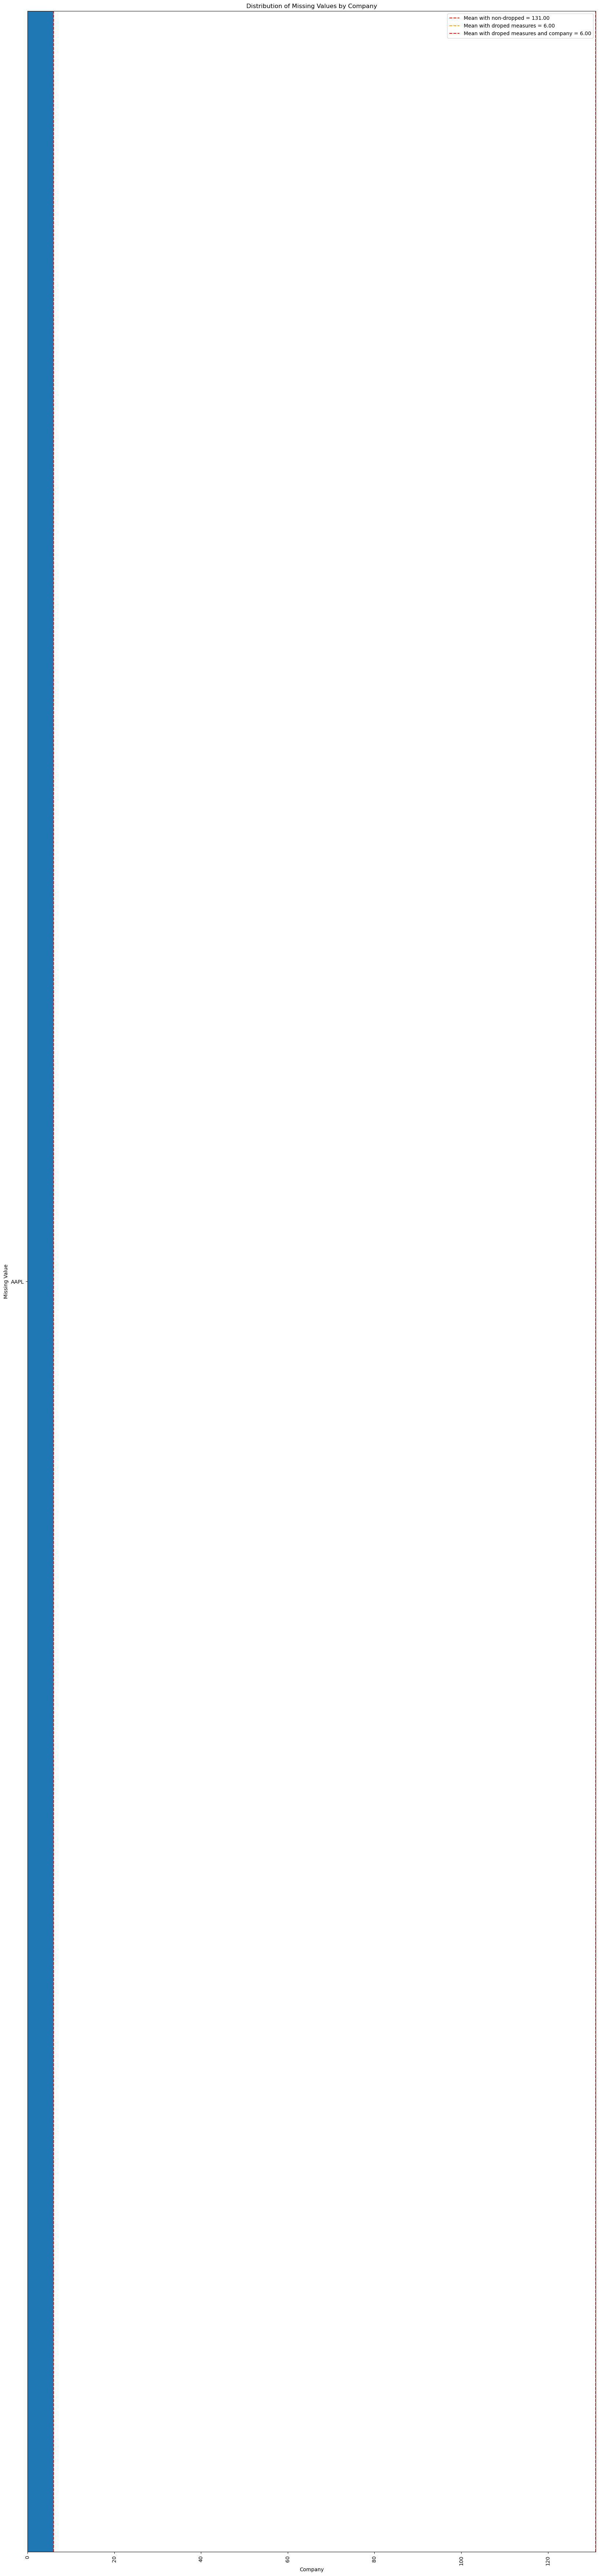

In [ ]:
df_missing_company = distribution_of_missing_company(df_new,False,False)
df_missing_company_droped = distribution_of_missing_company(df_new,True,False)
df_missing_company_measure_droped = distribution_of_missing_company(df_new, True, True)

mean_value = df_missing_company['VALUE'].mean()
mean_value_measure_droped = df_missing_company_droped['VALUE'].mean()
mean_value_measure_company_droped = df_missing_company_measure_droped['VALUE'].mean()

plt.figure(figsize=(20,90))
plt.barh(df_missing_company_droped['OFTIC'], df_missing_company_droped['VALUE'])
plt.xlabel('Company')
plt.ylabel('Missing Value')
plt.title('Distribution of Missing Values by Company')
plt.xticks(rotation=90)
plt.gca().invert_yaxis() 
plt.margins(0, 0)

plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean with non-dropped = {mean_value:.2f}')
plt.axvline(x=mean_value_measure_droped, color='orange', linestyle='--', label=f'Mean with droped measures = {mean_value_measure_droped:.2f}')
plt.axvline(x=mean_value_measure_company_droped, color='red', linestyle='--', label=f'Mean with droped measures and company = {mean_value_measure_company_droped:.2f}')


plt.legend()
plt.show()

In [ ]:
mean_value_measure = df_missings['VALUE'].mean()


plt.figure(figsize=(12, 6))
plt.bar(df_missings['MEASURE'], df_missings['VALUE'])
plt.xlabel('Measure')
plt.ylabel('Count of Missing Values')
plt.title('Distribution of Missing Values by Measure')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.axhline(y=mean_value_measure, color='red', linestyle='--', label=f'Mean = {mean_value_measure:.2f}')

plt.legend()
plt.show()


SyntaxError: invalid syntax (891520019.py, line 15)

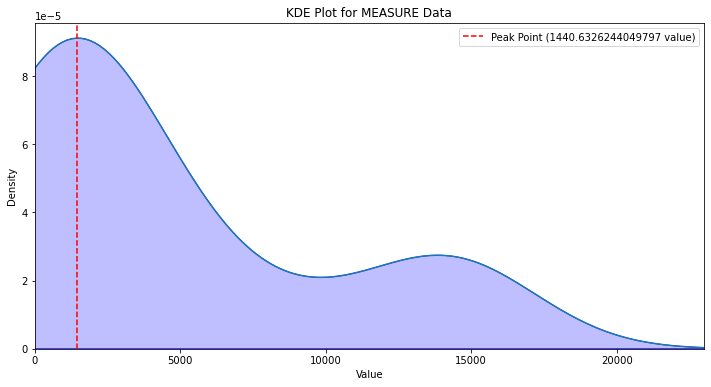

In [ ]:
# Create a KDE plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_missings['VALUE'], fill=True, color='blue')
plt.xlim(0, 23000) 
plt.xlabel('Value')
plt.title('KDE Plot for MEASURE Data')

# Find the peak location
kde = sns.kdeplot(data=df_missings['VALUE'], fill=False)
x, y = kde.get_lines()[0].get_data()
peak_x = x[y.argmax()]

plt.axvline(x=peak_x, color='red', linestyle='--', label=f'Peak Point ({peak_x} value)')

plt.legend()
plt.show()

In [ ]:
df_with_quarter = df_new.copy()
df_with_quarter.loc[:, 'QUARTER'] = df_with_quarter['PENDS'].dt.quarter
df_with_quarter.loc[:, 'YEAR'] = df_with_quarter['PENDS'].dt.year
df_with_quarter

,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,VALUE,QUARTER,YEAR
3,PAYC,PAYCOM SOFTWARE,2015-03-31,EPS,QTR,2015-05-06,0.120,1,2015
4,PAYC,PAYCOM SOFTWARE,2015-06-30,EPS,QTR,2015-08-04,0.100,2,2015
5,PAYC,PAYCOM SOFTWARE,2015-09-30,EPS,QTR,2015-11-03,0.080,3,2015
6,PAYC,PAYCOM SOFTWARE,2015-12-31,EPS,QTR,2016-02-09,0.100,4,2015
7,PAYC,PAYCOM SOFTWARE,2016-03-31,EPS,QTR,2016-05-03,0.330,1,2016
...,...,...,...,...,...,...,...,...,...
519499,TJX,TJX,2022-04-30,SAL,QTR,2022-05-18,11406.474,2,2022
519500,TJX,TJX,2022-07-31,SAL,QTR,2022-08-17,11843.008,3,2022
519501,TJX,TJX,2022-10-31,SAL,QTR,2022-11-16,12166.286,4,2022
519502,TJX,TJX,2023-01-31,SAL,QTR,2023-02-22,14520.000,1,2023


In [ ]:
df_with_quarter_interpolate = df_with_quarter.copy()
df_with_quarter_interpolate['VALUE'].interpolate(method='linear', inplace=True)
df_with_quarter_interpolate

,OFTIC,CNAME,PENDS,MEASURE,PDICITY,ANNDATS,VALUE,QUARTER,YEAR
3,PAYC,PAYCOM SOFTWARE,2015-03-31,EPS,QTR,2015-05-06,0.120,1,2015
4,PAYC,PAYCOM SOFTWARE,2015-06-30,EPS,QTR,2015-08-04,0.100,2,2015
5,PAYC,PAYCOM SOFTWARE,2015-09-30,EPS,QTR,2015-11-03,0.080,3,2015
6,PAYC,PAYCOM SOFTWARE,2015-12-31,EPS,QTR,2016-02-09,0.100,4,2015
7,PAYC,PAYCOM SOFTWARE,2016-03-31,EPS,QTR,2016-05-03,0.330,1,2016
...,...,...,...,...,...,...,...,...,...
519499,TJX,TJX,2022-04-30,SAL,QTR,2022-05-18,11406.474,2,2022
519500,TJX,TJX,2022-07-31,SAL,QTR,2022-08-17,11843.008,3,2022
519501,TJX,TJX,2022-10-31,SAL,QTR,2022-11-16,12166.286,4,2022
519502,TJX,TJX,2023-01-31,SAL,QTR,2023-02-22,14520.000,1,2023


In [ ]:
distribution_of_missing_measures(df_with_quarter_interpolate)

,MEASURE,VALUE
0,BPS,0
1,CPS,0
2,CPX,0
3,CSH,0
4,DPS,0
5,EBG,0
6,EBI,0
7,EBS,0
8,EBT,0
9,ENT,0


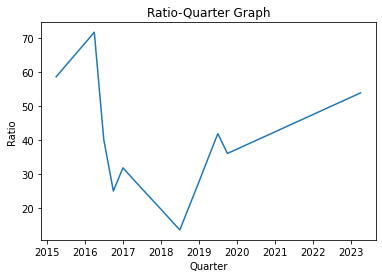

In [ ]:

# Select specific data based on conditions
x = df_with_quarter_interpolate[(df_with_quarter_interpolate['OFTIC'] == 'PAYC') & (df_with_quarter_interpolate['MEASURE'] == 'ROE')]

# Create a line plot
plt.plot(x['PENDS'], x['VALUE'])

# Add labels and a title
plt.xlabel('Quarter')
plt.ylabel('Ratio')
plt.title('Ratio-Quarter Graph')

# Show the plot
plt.show()

In [ ]:
# Drawing value-pends graph for one company and all measure

def draw_measure_pends(company, df):
    unique_measures = measures_symbols(df)

    num_measures = len(unique_measures)
    num_cols = 3  
    num_rows = (num_measures + num_cols - 1) // num_cols  

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

    for i, measure in enumerate(unique_measures):
        row, col = i // num_cols, i % num_cols
        x = df[(df['OFTIC'] == company) & (df['MEASURE'] == measure)]

        if num_rows == 1:
            axes[col].plot(x['PENDS'], x['VALUE'])
            axes[col].set_xlabel('Quarter')
            axes[col].set_ylabel('Ratio')
            axes[col].set_title(f'{measure} - Quarter Graph')
        else:
            axes[row, col].plot(x['PENDS'], x['VALUE'])
            axes[row, col].set_xlabel('Quarter')
            axes[row, col].set_ylabel('Ratio')
            axes[row, col].set_title(f'{measure} - Quarter Graph')

    for i in range(num_measures, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()

    plt.show()

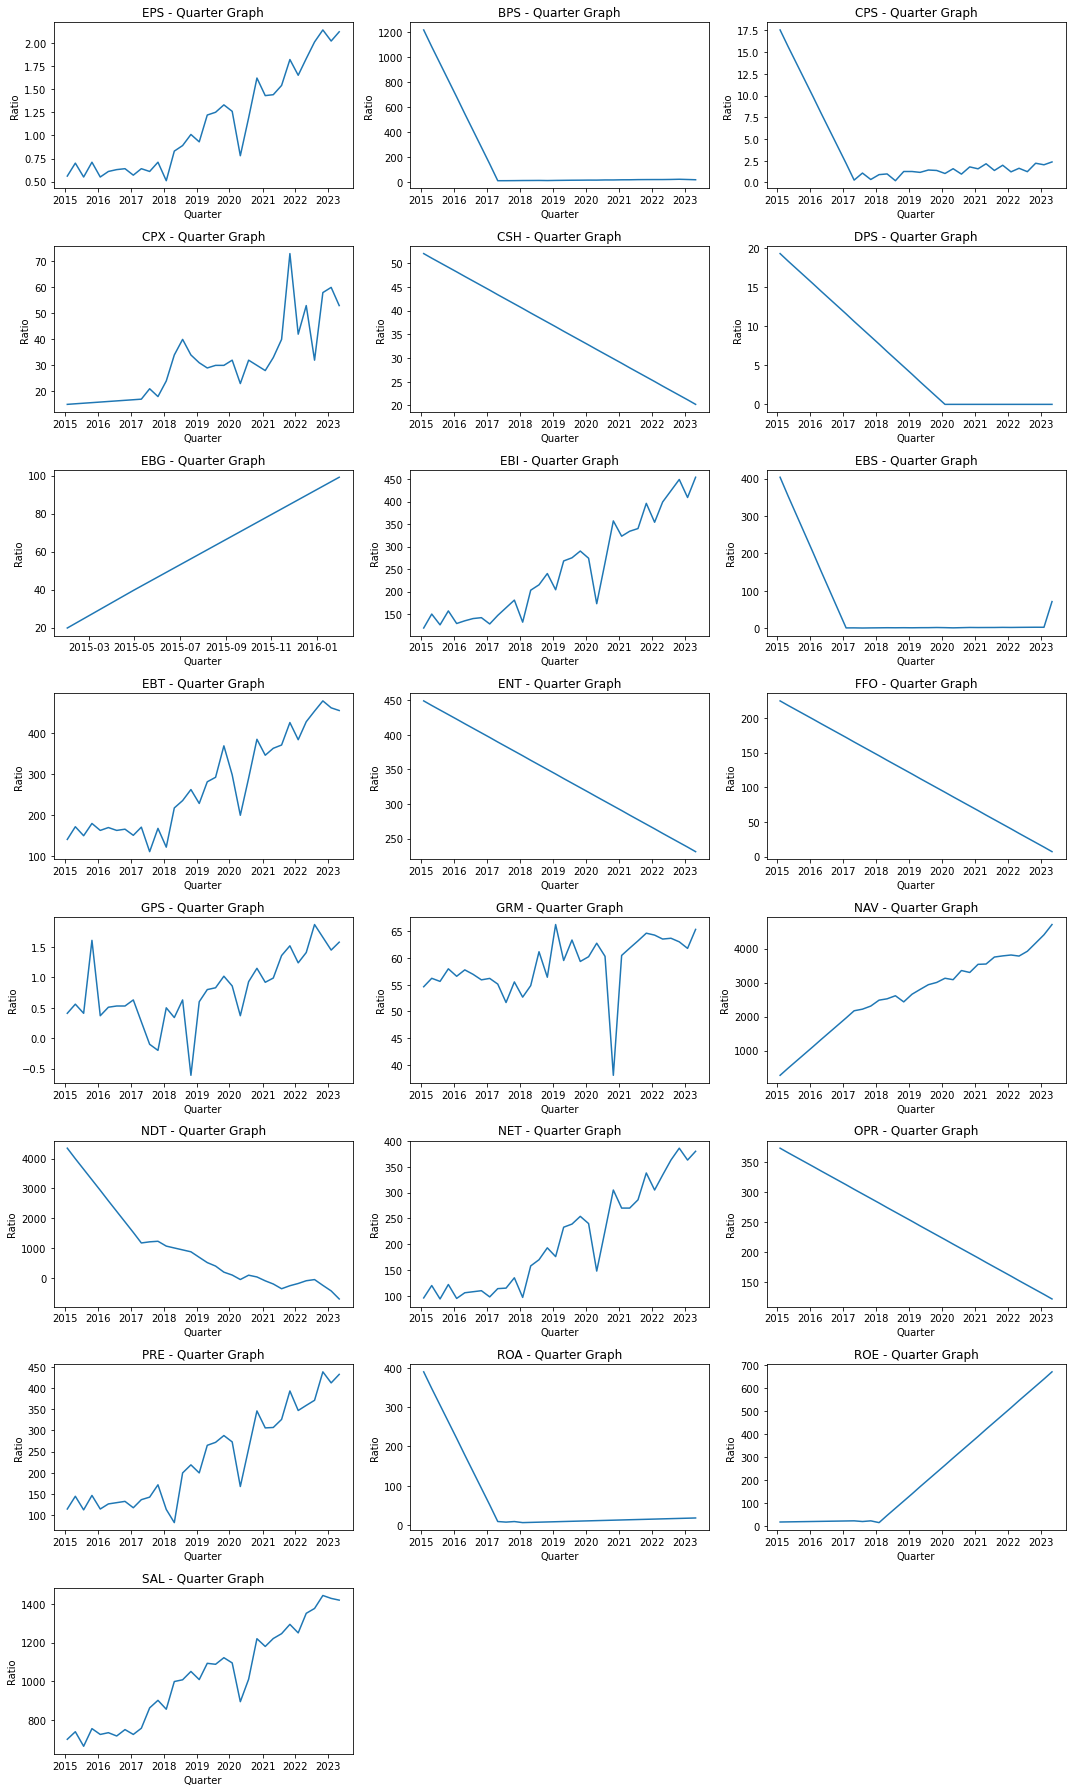

In [ ]:
draw_measure_pends('KEYS', df_with_quarter_interpolate)

In [ ]:
# Calculating the which measure of the company has how many missing values
missing_value_for_measure = df_new.groupby(['OFTIC', 'MEASURE'])['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()

missing_value_for_measure

,OFTIC,MEASURE,VALUE
0,A,BPS,1
1,A,CPS,0
2,A,CPX,0
3,A,CSH,33
4,A,DPS,4
...,...,...,...
10093,ZTS,OPR,30
10094,ZTS,PRE,1
10095,ZTS,ROA,33
10096,ZTS,ROE,33


<AxesSubplot:xlabel='MEASURE', ylabel='OFTIC'>

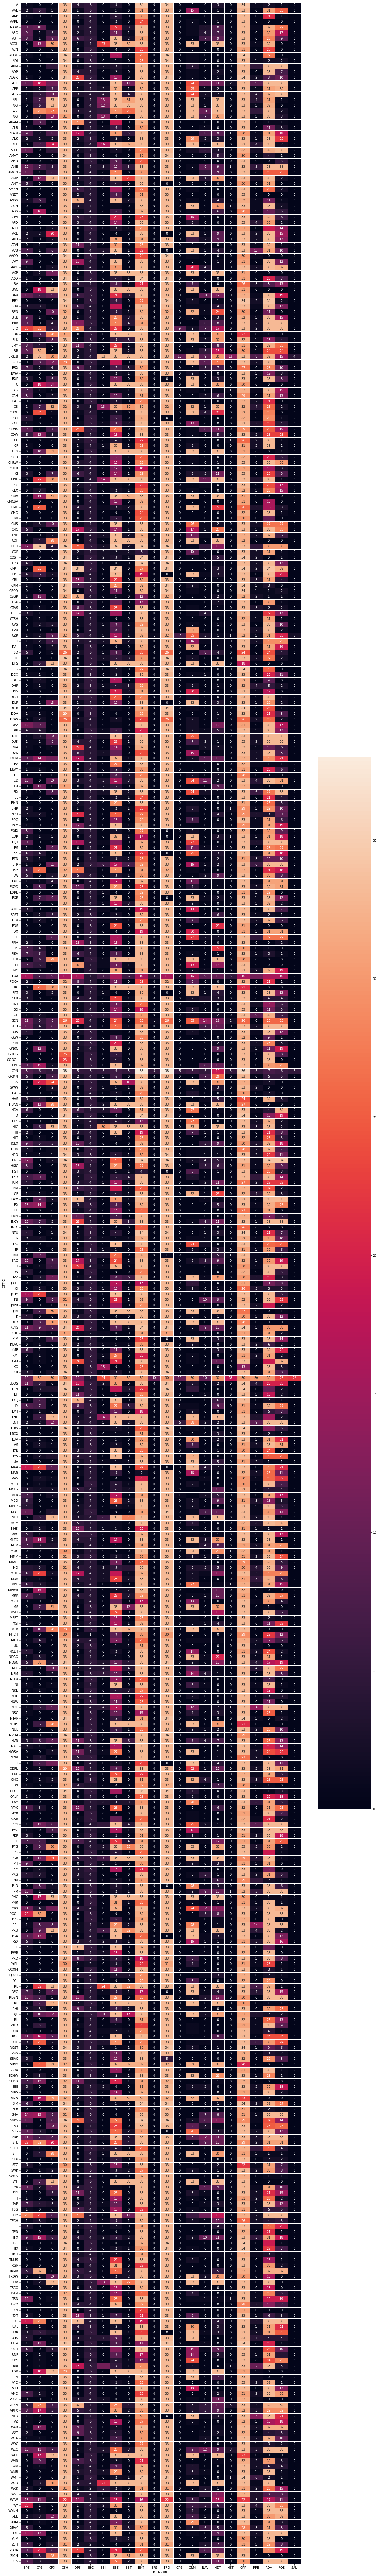

In [ ]:
heatmap_data = missing_value_for_measure.pivot('OFTIC', 'MEASURE', 'VALUE')

f, ax = plt.subplots(figsize=(20, 150))
sns.heatmap(heatmap_data, annot=True, fmt="d", linewidths=.5, ax=ax)


In [ ]:
missing_values_by_date = df_with_quarter.groupby(['YEAR','QUARTER'])['VALUE'].apply(lambda x: x.isnull().sum()).reset_index()
missing_values_by_date

,YEAR,QUARTER,VALUE
0,2015,1,3722
1,2015,2,3418
2,2015,3,3452
3,2015,4,3395
4,2016,1,3182
5,2016,2,3019
6,2016,3,3139
7,2016,4,2973
8,2017,1,3060
9,2017,2,2897


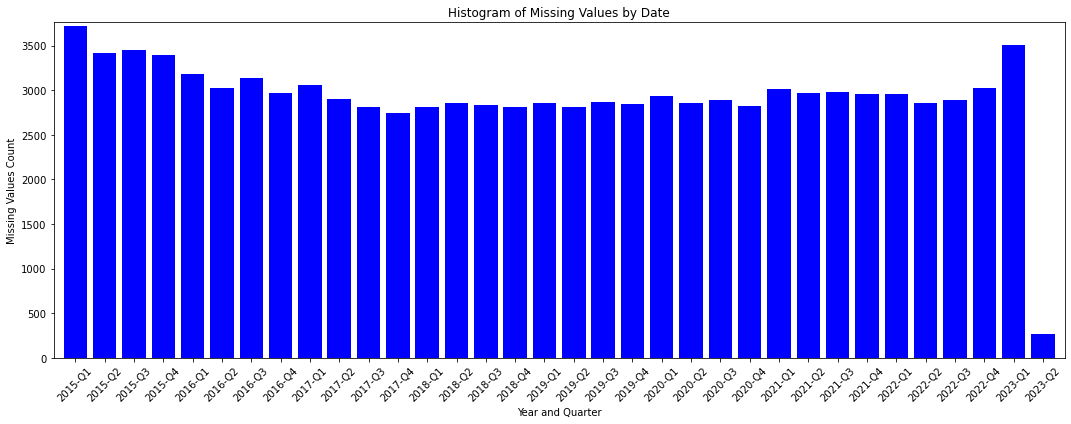

In [ ]:
year_quarter_labels = missing_values_by_date.apply(lambda row: f'{row["YEAR"]}-Q{row["QUARTER"]}', axis=1)

plt.figure(figsize=(15, 6)) 
plt.bar(year_quarter_labels, missing_values_by_date['VALUE'], color='blue')
plt.title('Histogram of Missing Values by Date')
plt.xlabel('Year and Quarter')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)  
plt.margins(0.01, 0.01)

plt.tight_layout()  
plt.show()

In [ ]:
df_with_quarter.loc[:, 'QUARTER_YEAR'] = df_with_quarter.apply(lambda row: f'{row["YEAR"]}-Q{row["QUARTER"]}', axis=1)

all_dates = df_with_quarter['QUARTER_YEAR'].unique()

# Create a DataFrame with all possible combinations of dates and companies
all_combinations = pd.MultiIndex.from_product([df_with_quarter['OFTIC'].unique(), all_dates], names=['OFTIC', 'QUARTER_YEAR'])
all_combinations_df = pd.DataFrame(index=all_combinations).reset_index()

concatenated_df = pd.concat([df_with_quarter[['OFTIC', 'QUARTER_YEAR']], all_combinations_df], ignore_index=True)

# Find and keep only the unique rows (rows that are different)
different_rows = concatenated_df.drop_duplicates(keep=False)

different_rows

,OFTIC,QUARTER_YEAR
319506,PAYC,2023-Q2
319540,ANET,2023-Q2
319575,MTCH,2015-Q1
319576,MTCH,2015-Q2
319577,MTCH,2015-Q3
...,...,...
334976,ZION,2023-Q2
334977,ZBH,2015-Q1
334978,ZBH,2015-Q2
335010,ZBH,2023-Q2


In [ ]:
different_rows.groupby('QUARTER_YEAR')['QUARTER_YEAR'].count()

QUARTER_YEAR
2015-Q1      9
2015-Q2      5
2015-Q3      1
2015-Q4      1
2017-Q1      1
2017-Q3      2
2017-Q4      2
2018-Q1      2
2018-Q2      2
2018-Q3      2
2018-Q4      2
2019-Q1      4
2019-Q2      2
2019-Q3      2
2019-Q4      2
2020-Q1      2
2020-Q2      3
2020-Q3      2
2020-Q4      2
2021-Q1      3
2021-Q2      3
2021-Q3      3
2021-Q4      3
2022-Q1      3
2022-Q2      3
2022-Q3      3
2022-Q4      1
2023-Q1      3
2023-Q2    421
Name: QUARTER_YEAR, dtype: int64